**TASK**<br>
1. Analisa kira kira variabel apa yang bisa dipakai untuk klusterisasi tipe tipe pelanggan<br>
2. Visualisasikan mana pelanggan yang perlu diperhatikan dan tidak perlu diperhatikan



# A. Data Preparation

In [71]:
# Import Library 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### A.1 Data Extraction

In [72]:
df = pd.read_csv('Online_Retail.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,1,1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### A.2 Data Cleaning

In [73]:
print(df.isnull().sum())
print(df.shape)


Unnamed: 0.1         0
Unnamed: 0           0
InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
dtype: int64
(541909, 10)


# B. Exploratory Data Analysis (EDA)

### B.1 Data Preprocessing + Analisis

B.1.1 Menghapus baris yang memiliki nilai null, mereset index nya lalu menghitung nilai null dan menampilkan panjang data

In [74]:
df_cln = df.dropna().reset_index()
print(df_cln.isnull().sum())
print(df_cln.shape)

index           0
Unnamed: 0.1    0
Unnamed: 0      0
InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
dtype: int64
(406829, 11)


B.1.2 Melihat Informasi dan Deskripsi Data

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.1  541909 non-null  int64  
 1   Unnamed: 0    541909 non-null  int64  
 2   InvoiceNo     541909 non-null  object 
 3   StockCode     541909 non-null  object 
 4   Description   540455 non-null  object 
 5   Quantity      541909 non-null  int64  
 6   InvoiceDate   541909 non-null  object 
 7   UnitPrice     541909 non-null  float64
 8   CustomerID    406829 non-null  float64
 9   Country       541909 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 41.3+ MB


In [76]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,541908.000000,80995.000000,38970.000000,18287.000000


B.1.3 Menghitung banyak barang yang sudah dibeli setiap customer lalu menjadikannya DataFrame

In [77]:
df_cln ['CustomerID'] = df_cln['CustomerID']
df_cln ['TotalPembelian'] = df_cln['Quantity'] * df_cln['UnitPrice']
totalbeli = df_cln.groupby('CustomerID')['TotalPembelian'].sum().reset_index()
totalbeli.columns = ['Customer_Id', 'Total_Pembelian']
totalbeli = pd.DataFrame(totalbeli)
totalbeli 
 

,Customer_Id,Total_Pembelian
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


B.1.4 Menghitung sudah berapa banyak setiap customer melakukan transaksi lalu menjadikannya DataFrame

In [78]:
Banyaktransaksi = df_cln.groupby('CustomerID')['InvoiceNo'].count().reset_index()
Banyaktransaksi.columns = ['Customer_Id', 'Jumlah_Transaksi']
Banyaktransaksi = pd.DataFrame(Banyaktransaksi)
Banyaktransaksi

,Customer_Id,Jumlah_Transaksi
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


B.1.5 Menghitung kapan terakhir kali customer membeli barang di toko, dihitung dari tanggal paling baru di data

In [79]:
df_cln['InvoiceDate']

0          12/1/10 8:26
1          12/1/10 8:26
2          12/1/10 8:26
3          12/1/10 8:26
4          12/1/10 8:26
              ...      
406824    12/9/11 12:50
406825    12/9/11 12:50
406826    12/9/11 12:50
406827    12/9/11 12:50
406828    12/9/11 12:50
Name: InvoiceDate, Length: 406829, dtype: object

In [80]:
df_cln['InvoiceDate'] = pd.to_datetime(df_cln['InvoiceDate'],format = '%m/%d/%y %H:%M')
tanggal_max = max(df_cln['InvoiceDate'])
df_cln['Terakhir_Pembelian'] = tanggal_max - df_cln['InvoiceDate']
terakhirpembelian = df_cln.groupby('CustomerID')['Terakhir_Pembelian'].min().reset_index()
terakhirpembelian.columns = ['Customer_Id', 'Terakhir_Pembelian']
# konversi terakhir pembelian dari tipe data timedelta ke jumlah hari menggunakan metode .dt.days.
terakhirpembelian['Terakhir_Pembelian'] = terakhirpembelian['Terakhir_Pembelian'].dt.days
terakhirpembelian = pd.DataFrame(terakhirpembelian)
terakhirpembelian


,Customer_Id,Terakhir_Pembelian
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


B.1.6 Menggabungkan 3 data diatas berdasarkan customer id menggunakan merge

In [81]:
new_data = totalbeli.merge(Banyaktransaksi, on='Customer_Id').merge(terakhirpembelian, on='Customer_Id')
new_data

,Customer_Id,Total_Pembelian,Jumlah_Transaksi,Terakhir_Pembelian
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


B.1.7 Dari data tersebut yang saya butuhkan hanya 3 kolom terakhir jadi agar memudahkan, saya menghapus kolom Customer_Id 

In [82]:
df = new_data.drop('Customer_Id', axis = 1)
df

,Total_Pembelian,Jumlah_Transaksi,Terakhir_Pembelian
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7
4370,2094.88,756,3


B.1.8 Visualisasi Boxplot untuk cek Outlier 

<Axes: >

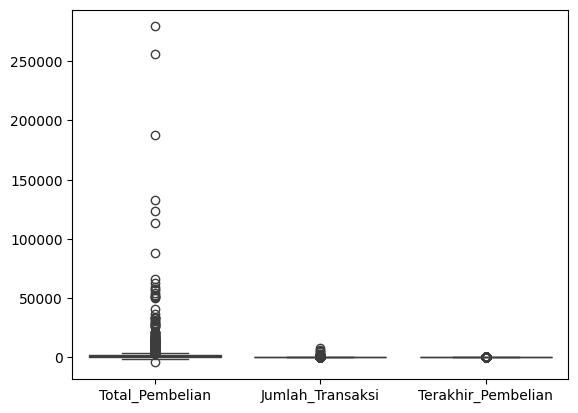

In [83]:
sns.boxplot(df)

B.1.9 Menangani Outlier dengan iqr

In [84]:
q1 = df.Total_Pembelian.quantile(0.25)
q3 = df.Total_Pembelian.quantile(0.75)
iqr = q3 - q1
iqr

1318.3625

In [85]:
# df = df[~((df.Total_Pembelian < (q1 - 1.5*iqr))| (df.Total_Pembelian > (q3 + 1.5*iqr)))]


# outlier = df[(df.Total_Pembelian < (q1 - 1.5*iqr))| (df.Total_Pembelian > (q3 + 1.5*iqr))]
# median_value = df['Total_Pembelian'].mode()
# df.loc[outlier.index, 'Total_Pembelian'] = median_value

# mengatasi outlier kolom total pembelian
q1 = df.Total_Pembelian.quantile(0.25)
q3 = df.Total_Pembelian.quantile(0.75)
iqr = q3 - q1
df = df[(df.Total_Pembelian >= q1 - 1.5*iqr) & (df.Total_Pembelian <= q3 + 1.5*iqr)]

# mengatasi outlier kolom jumlah transaksi
q1 = df.Jumlah_Transaksi.quantile(0.25)
q3 = df.Jumlah_Transaksi.quantile(0.75)
iqr = q3 - q1
df = df[(df.Jumlah_Transaksi >= q1 - 1.5*iqr) & (df.Jumlah_Transaksi <= q3 + 1.5*iqr)]

# mengatasi outlier kolom terakhir pembelian
q1 = df.Terakhir_Pembelian.quantile(0.25)
q3 = df.Terakhir_Pembelian.quantile(0.75)
iqr = q3 - q1
df = df[(df.Terakhir_Pembelian >= q1 - 1.5*iqr) & (df.Terakhir_Pembelian <= q3 + 1.5*iqr)]

In [86]:
df.shape

(3697, 3)

B.1.10 Mengubah skala menggunakan minmaxscaler, serta memilih variabel yang dipakai untuk tipe tipe pelanggan yaitu 3 kolom yang Customer_id nya dihapus tadi

In [87]:
scaler = MinMaxScaler()
x = df
df_scaled = scaler.fit_transform(x)
df_scaled

array([[0.30884115, 0.00564972, 0.87131367],
       [0.65739071, 0.16949153, 0.19839142],
       [0.64969339, 0.40677966, 0.04825737],
       ...,
       [0.32451506, 0.03389831, 0.48257373],
       [0.34309025, 0.06779661, 0.01876676],
       [0.66515591, 0.38983051, 0.11260054]])

# C. Permodelan Data

### C.1 Define Algorithm

In [88]:
from sklearn.metrics import silhouette_score
# model 
wcss = [] # untuk menampung within cluster sum of squares

In [89]:
# membuat for loop untuk setiap cluster di range 1 sampai 10
for i in range (1,11) : 
    kmeans = KMeans(n_clusters=i, n_init=10) # n_cluster = jumlah cluster n_init = mengontrol jumlah kali pemilihan pusat klaster akan dilakukan dengan inisialisasi yang berbeda
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) # inertia untuk memberi nilai wcss 

C.1.1 Menentukan jumlah pusat cluster dengan Elbow Method

Text(0.5, 0, 'wcss')

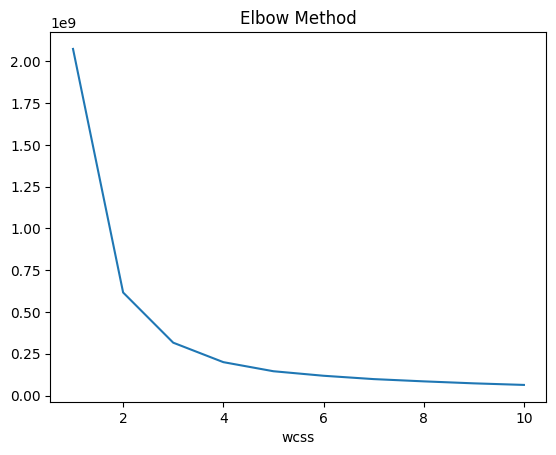

In [90]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number Of Cluster')
plt.xlabel('wcss')

C.1.2 Menentukan jumlah pusat cluster dengan silhouette_score

In [91]:
for i in range (2,11) : 
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42) # n_cluster = jumlah cluster n_init = mengontrol jumlah kali pemilihan pusat klaster akan dilakukan dengan inisialisasi yang berbeda
    kmeans.fit(x)
    silhouette_avg = silhouette_score(x, kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))  

For n_clusters=2, the silhouette score is 0.6770650364586208
For n_clusters=3, the silhouette score is 0.593017271418894
For n_clusters=4, the silhouette score is 0.5227172677339016
For n_clusters=5, the silhouette score is 0.48340882863313245
For n_clusters=6, the silhouette score is 0.4502475165368625
For n_clusters=7, the silhouette score is 0.39099533004455367
For n_clusters=8, the silhouette score is 0.403932914981845
For n_clusters=9, the silhouette score is 0.4033878112877099
For n_clusters=10, the silhouette score is 0.40515844444532273


C.1.3 Dilihat dari silhouette score yang paling tinggi adalah n_cluster=2, maka jumlah pusat cluster nya 2
<br>Menghitung dengan jumlah pusat cluster nya 3, dimana itu merupakan optimal number cluster

In [92]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(x) # untuk mengmbalikan var dependen yang akan dibuat
y_kmeans

array([1, 0, 0, ..., 1, 1, 0], dtype=int32)

C.1.4 Menentukan nama cluster dengan menghitung rata-rata setiap fitur dalam setiap cluster

In [93]:
cluster_means = x.groupby(y_kmeans).mean()
print(cluster_means)


   Total_Pembelian  Jumlah_Transaksi  Terakhir_Pembelian
0      1995.356238         92.035156           49.399740
1       450.425327         34.759986          117.398088


C.1.5 Visualisasi Tipe Tipe Pelanggan

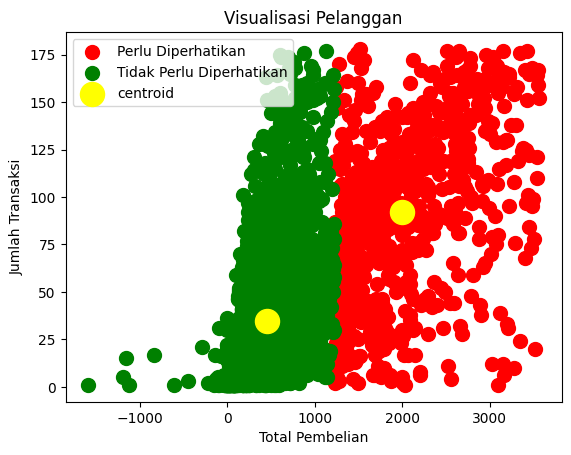

In [94]:
plt.scatter(x.iloc[y_kmeans == 0,0], x.iloc[y_kmeans ==0,1], s = 100, c = 'red', label = 'Perlu Diperhatikan')
plt.scatter(x.iloc[y_kmeans == 1,0], x.iloc[y_kmeans ==1,1], s = 100, c = 'green', label = 'Tidak Perlu Diperhatikan')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroid')
plt.title ('Visualisasi Pelanggan')
plt.xlabel('Total Pembelian')
plt.ylabel('Jumlah Transaksi')
plt.legend()
plt.show()

### C.2 Algorithm Used

In [95]:
newdata = [[800, 12, 75]]
kmeans.predict(newdata)

/home/fork/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

# D. Evaluasi Model Prediksi

### D.1 Hasil Akurasi

In [96]:
from sklearn.metrics import adjusted_rand_score 
ari_score = adjusted_rand_score(y_kmeans,kmeans.labels_)
print("Adjusted Rand Index (ARI):", ari_score)


Adjusted Rand Index (ARI): 1.0


In [97]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(x,kmeans.labels_)
print('silhouette score : ',sil)

silhouette score :  0.6770650364586208


### D.2 Visualisasi Hasil Akurasi

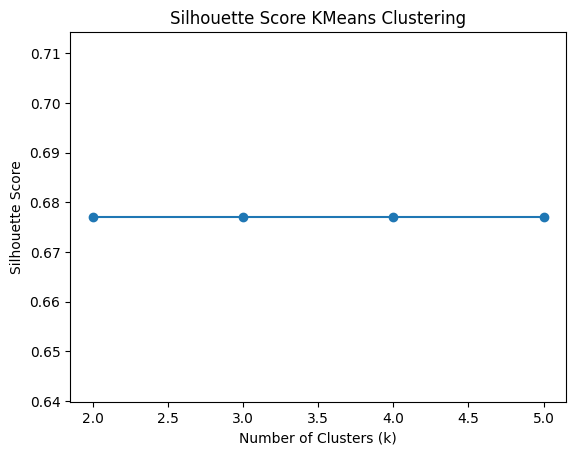

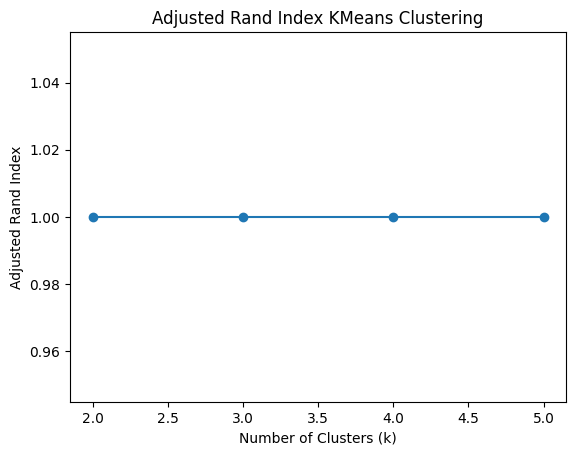

In [105]:
silhouette_scores = []
ari_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    silhouette_avg = sil
    silhouette_scores.append(silhouette_avg)
    ari = ari_score
    ari_scores.append(ari)

# Memplot Silhouette Score untuk berbagai nilai k
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score KMeans Clustering')
plt.show()
# Memplot ARI untuk berbagai nilai k
plt.plot(range(2, 6), ari_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index KMeans Clustering')
plt.show()

### COMMENTS

cara menentukan kemiripan data dengan pengukuran jarak data<br>
menggunakan euclidean distance = <br>
d = akar pangkat 2 dari sigma/penjumlahan dari selisih antara (xi dan yi) ^ 2<br>
xi = atribut data yang pertama<br>
yi = atribut data yang kedua<br>
<br>
contoh ada 2 data dengan 3 kolom, maka :<br>
d1 = akar (kolom1 data lama- kolom1 data baru)^2 + (kolom2 data lama- kolom2 data baru)^2 +(kolom3 data lama- kolom3 data baru)^2<br>
dst sampai baris di data lama habis lalu dari setiap baris tsb dilihat mana yang nilai nya paling kecil, maka kolom data baru tsb masuk ke golongan tsb

nah dari data tsb bisa disimpulkan nama nama cluster nya<br>
0 = customer perlu diperhatikan<br>
1 = customer tidak perlu diperhatikan